In [44]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [45]:
directory = os.path.join('sample_data', 'california_housing_train.csv') # Output: sample_data/california_housing_train.csv

if os.path.isfile(directory):
  print("File ditemukan")

File ditemukan


In [46]:
datasets = pd.read_csv(directory)
datasets.head() # Mengeluarkan beberapa data awal

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


# No. 1

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3c8afe2978>,
      dtype=object)

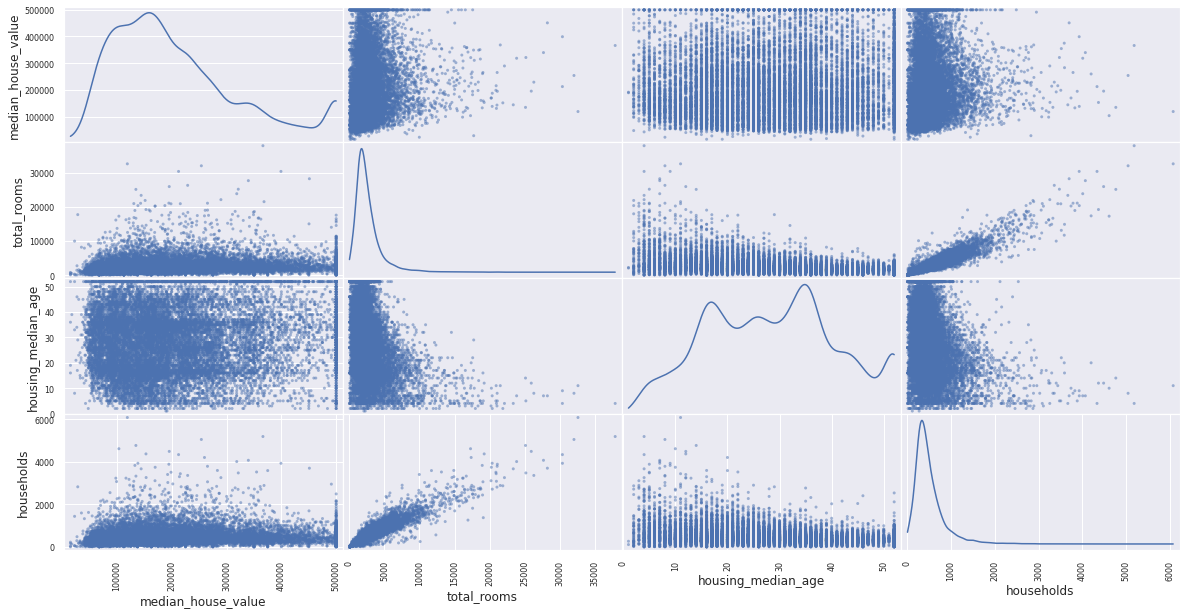

In [117]:
sb.set()
features=['median_house_value','total_rooms','housing_median_age','households']

pd.plotting.scatter_matrix(datasets[features], figsize=(20,10),diagonal='kde')

# No. 2

In [81]:
from sklearn import preprocessing
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

scaler = preprocessing.StandardScaler()
forest_reg = RandomForestRegressor() 

feature_used= datasets.drop(['median_house_value'],axis=1)
label =datasets['median_house_value']

#merubah data
feature_scaled =scaler.fit_transform(feature_used.values)
label_scaled =scaler.fit_transform(label.values.reshape(-1,1)).flatten()


#penentuan data train dan test
feature_train_80, feature_test_20,label_train_80, label_test_20 = train_test_split(feature_scaled, label_scaled, test_size=0.2) # 80% training, 20% testing
feature_train_85, feature_test_15,label_train_85, label_test_15 = train_test_split(feature_scaled, label_scaled, test_size=0.15) # 85% training, 15% testing
feature_train_90, feature_test_10,label_train_90, label_test_10 = train_test_split(feature_scaled, label_scaled, test_size=0.1) # 90% training, 10% testing

In [91]:
forest_reg.fit(feature_train_80,label_train_80)
r2_score(forest_reg.predict(feature_test_20),label_test_20)

0.7851122273543563

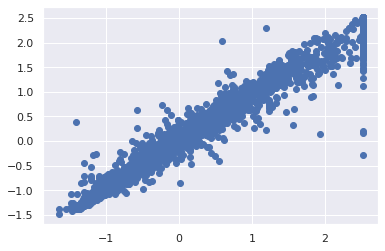

In [119]:
plt.scatter(label_test_20, forest_reg.predict(feature_test_20))

In [92]:
forest_reg.fit(feature_train_85,label_train_85)
r2_score(forest_reg.predict(feature_test_15),label_test_15)

0.7708647098791379

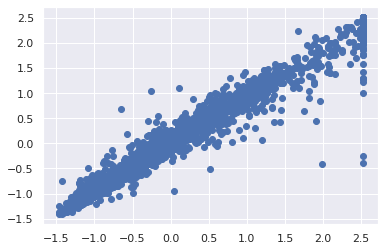

In [120]:
plt.scatter(label_test_15, forest_reg.predict(feature_test_15))

In [93]:
forest_reg.fit(feature_train_90,label_train_90)
r2_score(forest_reg.predict(feature_test_10),label_test_10)

0.7394060232390569

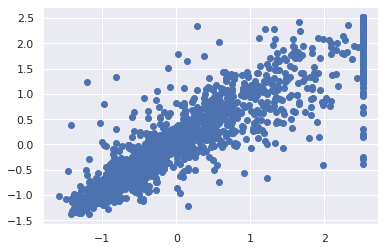

In [121]:
plt.scatter(label_test_10, forest_reg.predict(feature_test_10))

berdasarkan hasil diatas diketahui bahwa pembagian 80:20 untuk dataset memiliki nilai sedikit lebih tinggi di bandikan dengan pembagian data yang lain (85:15 dan 90:10).
karena data training menentukan tingkat akurasi. data training lebih banyak belum tentu lebih baik, bisa saja malah menjadi tidak normal dan menyebabkan menurunnya tingkat akurasi. jadi kembali lagi kepada data yang kita gunakan, bila data nya baik dan normal pasti akurasi juga akan semakin membaik.


*(hasil di atas berdasarkan running program pertama. karena komputer juga mengambil data secara random, jadi data dapat berubah-ubah tetapi tidak terlalu jauh dari nilai tersebut atau berkisaran 70%-an untuk ketiga kondisi tersebut)

# No. 3

In [94]:
from sklearn.svm import SVR
svr_reg   = SVR(kernel='linear', gamma='auto')
svr_rbf   = SVR(kernel='rbf', gamma=0.1, epsilon=.1)
svr_poly  = SVR(kernel='poly', gamma='auto', degree=3, epsilon=.1,coef0=1)

svr_reg.fit(feature_train_80,label_train_80)
svr_rbf.fit(feature_train_80,label_train_80)
svr_poly.fit(feature_train_80,label_train_80)

SVR(C=1.0, cache_size=200, coef0=1, degree=3, epsilon=0.1, gamma='auto',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [111]:
r2_score(svr_reg.predict(feature_test_20),label_test_20)

0.4370187643192115

In [112]:
r2_score(svr_rbf.predict(feature_test_20),label_test_20)

0.673473497068763

In [113]:
r2_score(svr_poly.predict(feature_test_20),label_test_20)

0.5872780575738723

In [106]:
from sklearn import linear_model
linear_reg=linear_model.LinearRegression()
linear_reg.fit(feature_train_80,label_train_80)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [107]:
r2_score(linear_reg.predict(feature_test_20),label_test_20)

0.4536808363279513

berdasarkan hasil diatas dapat dilihat bahwa svr memiliki dimensi yang tidak hanya linear tetapi juga dapat memiliki banyak dimensi tergantung kernel yang kita gunakan. hasil r2_score dari svr dibandingkan dengan linear regression bisa di bilang lebih baik karena svr dapat membandingkan dari berbagai dimensi.

untuk kecepatan linear memang lebih unggul dibandingkan dengan svr. tetapi untuk tingkat akurasi svr lebih unggul di bandingkan linear regression